In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df=pd.read_csv("Social_Network_Ads.csv")

In [5]:
df.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [7]:
df.tail()

,User ID,Gender,Age,EstimatedSalary,Purchased
395,15691863,Female,46,41000,1
396,15706071,Male,51,23000,1
397,15654296,Female,50,20000,1
398,15755018,Male,36,33000,0
399,15594041,Female,49,36000,1


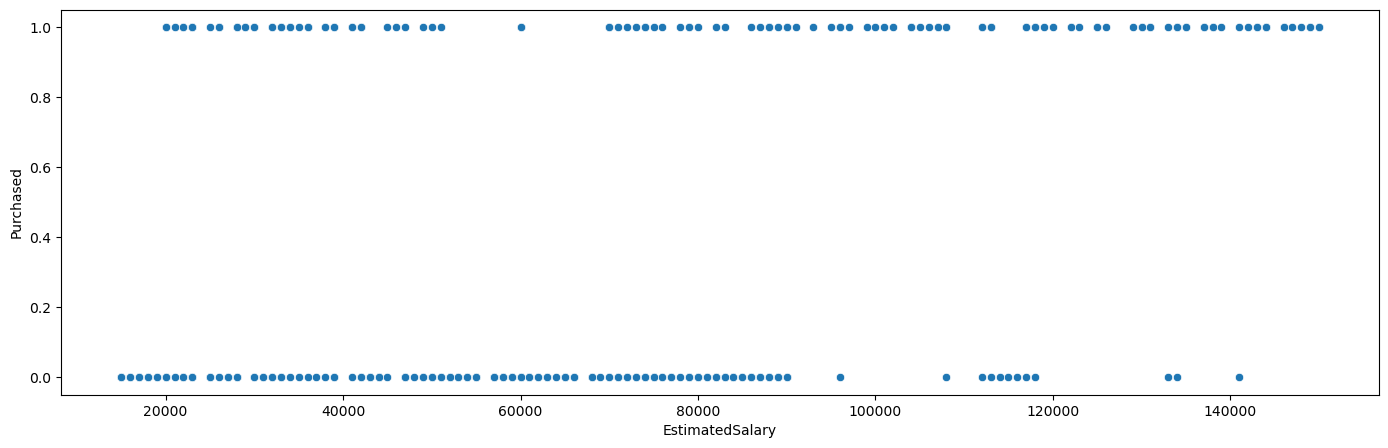

In [9]:
plt.figure(figsize=(17,5))
sns.scatterplot(data=df,x=df.EstimatedSalary,y=df.Purchased)
plt.show()

In [11]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 5 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   User ID          400 non-null    int64 
 1   Gender           400 non-null    object
 2   Age              400 non-null    int64 
 3   EstimatedSalary  400 non-null    int64 
 4   Purchased        400 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 15.8+ KB


In [13]:
df.describe()

,User ID,Age,EstimatedSalary,Purchased
count,4.000000e+02,400.000000,400.000000,400.000000
mean,1.569154e+07,37.655000,69742.500000,0.357500
std,7.165832e+04,10.482877,34096.960282,0.479864
min,1.556669e+07,18.000000,15000.000000,0.000000
25%,1.562676e+07,29.750000,43000.000000,0.000000
50%,1.569434e+07,37.000000,70000.000000,0.000000
75%,1.575036e+07,46.000000,88000.000000,1.000000
max,1.581524e+07,60.000000,150000.000000,1.000000


In [15]:
df.drop(columns=['User ID'],inplace=True)

In [23]:
print(df.columns)

Index(['Gender', 'Age', 'EstimatedSalary', 'Purchased'], dtype='object')


In [25]:
from sklearn.preprocessing import LabelEncoder

In [27]:
df['Gender']=LabelEncoder().fit_transform(df['Gender'])

In [29]:
df.head()

,Gender,Age,EstimatedSalary,Purchased
0,1,19,19000,0
1,1,35,20000,0
2,0,26,43000,0
3,0,27,57000,0
4,1,19,76000,0


In [33]:
x=df.drop(columns=['Purchased'])
y=df['Purchased']

In [35]:
from sklearn.model_selection import train_test_split

In [37]:
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.3,random_state=42)

In [74]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression(C=1.0)

In [76]:
model.fit(xtrain,ytrain)

C:\Users\giridharanks\anaconda3\Lib\site-packages\sklearn\linear_model\_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [78]:
ypred=model.predict(xtest)

In [80]:
from sklearn import metrics

In [82]:
cm=metrics.confusion_matrix(ytest,ypred)

In [84]:
cm

array([[71,  2],
       [15, 32]], dtype=int64)

In [86]:
acc=metrics.accuracy_score(ypred,ytest)

In [93]:
acc

0.8583333333333333

<Axes: >

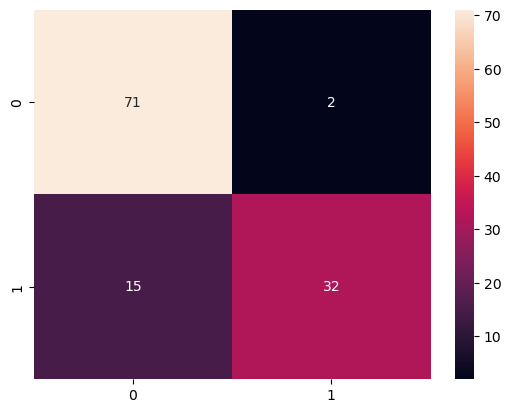

In [97]:
sns.heatmap(data=cm,annot=True)